# Exploratory Data Analysis

<hr />

## Import libraries

In [24]:
import pandas as pd
import numpy as np
import openpyxl
from matplotlib import pyplot as plt
import seaborn as sns
import spacy
from kmodes.kprototypes import KPrototypes
from sklearn.impute import SimpleImputer
import altair as alt
alt.renderers.enable('mimetype')
pd.set_option("display.max_columns", None)

<hr />



## Read in CSV train file to pandas

In [32]:
# train_df = pd.read_csv(
#     "../data/processed/train.csv",
# )
train_df = pd.read_excel(
    "../data/processed/df_full_security.xlsx",
)
y_train = train_df['Risk_Label'].fillna(value="Missing")
train_df.head()

api_endpoint_id  request_id method  \
0                1       23688    get   
1                2       23597    get   
2                2       23597    get   
3                2       23597    get   
4                2       23597    get   

                                          parameters  usage_base  \
0  {"q": "Vancouver", "mode": "JSON", "type": "ac...           2   
1                               {"q": "hello world"}           2   
2                               {"q": "hello world"}           2   
3                               {"q": "hello world"}           2   
4                               {"q": "hello world"}           2   

                                     sample_response  authentication  \
0  {"coord":{"lon":-123.1193,"lat":49.2497},"weat...               1   
1  {\n  "kind": "books#volumes",\n  "totalItems":...               1   
2  {\n  "kind": "books#volumes",\n  "totalItems":...               1   
3  {\n  "kind": "books#volumes",\n  "totalItems":...               1   
4  {\n  "kind": "books#volumes",\n  "totalItems":...               1   

   server_name                                  response_metadata  is_pii  \
0            1  {"Date": "Mon, 23 Aug 2021 19:49:39 GMT", "Ser...       1   
1            1  {"Date": "Fri, 30 Jul 2021 21:48:43 GMT", "Var...       1   
2            1  {"Date": "Fri, 30 Jul 2021 21:48:43 GMT", "Var...       1   
3            1  {"Date": "Fri, 30 Jul 2021 21:48:43 GMT", "Var...       1   
4            1  {"Date": "Fri, 30 Jul 2021 21:48:43 GMT", "Var...       1   

   is_fii        Country  NRI score  AI & Data Science  Business & Technology  \
0       0  United States  81.089820                  0                      0   
1       0         Canada  76.479613                  0                      0   
2       0         Canada  76.479613                  0                      0   
3       0         Canada  76.479613                  0                      0   
4       0         Canada  76.479613                  0                      0   

   Environment & Weather  Finance & Banking  GeoInformatics & Navigation  \
0                      1                  0                            0   
1                      0                  0                            0   
2                      0                  0                            0   
3                      0                  0                            0   
4                      0                  0                            0   

   Government & Public Services  Health Science & Medicine  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Information & Science  Justice & Public Safety  Logistics & Infrastructure  \
0                      0                        0                           0   
1                      1                        0                           0   
2                      1                        0                           0   
3                      1                        0                           0   
4                      1                        0                           0   

   Natural Resources & Energy  News & Media  None  Religion & Spirituality  \
0                           0             0     0                        0   
1                           0             0     0                        0   
2                           0             0     0                        0   
3                           0             0     0                        0   
4                           0             0     0                        0   

   Research & Education  Sales & Marketing  Security & Technology  \
0                     0                  0                      0   
1                     0                 

In [3]:
train_df = train_df.drop(
    columns=[
        "api_endpoint_id",
        "request_id",
        "sample_response",
        "parameters",
        "response_metadata",
        "AI & Data Science",
        "Business & Technology",
        "Environment & Weather",
        "Finance & Banking",
        "Food, Health & Medicine",
        "GeoInformatics & Navigation",
        "Government & Public Services",
        "Health Science & Medicine",
        "Information & Science",
        "Justice & Public Safety",
        "Logistics & Infrastructure",
        "Natural Resources & Energy",
        "News & Media",
        "None",
        "Religion & Spirituality",
        "Research & Education",
        "Sales & Marketing",
        "Security & Technology",
        "Skills & Career Development",
        "Social Media & Technology",
        "Software & Services",
        "Sports & Entertainment",
        "Transportation & Automobile",
        "Work & Personal Life",
        "eCommerce & Trade",
        "Risk_Label",
    ]
)
train_df

method  usage_base  authentication  server_name  is_pii  is_fii  \
0       get           2               1            1       1       0   
1       get           2               1            1       1       0   
2       get           2               1            1       1       0   
3       get           2               1            1       1       0   
4       get           2               1            1       1       0   
...     ...         ...             ...          ...     ...     ...   
4077      0           0               0            0       0       0   
4078      0           0               0            0       0       0   
4079      0           0               0            0       0       0   
4080      0           0               0            0       0       0   
4081      0           0               0            0       0       0   

            Country  NRI score  security_test_result  \
0     United States  81.089820                     1   
1            Canada  76.479613                     1   
2            Canada  76.479613                     1   
3            Canada  76.479613                     1   
4            Canada  76.479613                     1   
...             ...        ...                   ...   
4077              0   0.000000                     0   
4078              0   0.000000                     0   
4079              0   0.000000                     0   
4080              0   0.000000                     0   
4081              0   0.000000                     0   

      x0_Broken Authentication  x0_Cross-Site Scripting  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
4077                         0                        0   
4078                         0                        0   
4079                         0                        0   
4080                         0                        0   
4081                         0                        0   

      x0_Insecure Deserialization  x0_Missing  x0_SQL Injection  \
0                               0           1                 0   
1                               0           1                 0   
2                               0           1                 0   
3                               0           1                 0   
4                               0           1                 0   
...                           ...         ...               ...   
4077                            0           0                 0   
4078                            0           0                 0   
4079                            0           0                 0   
4080                            0           0                 0   
4081                            0           0                 0   

      x0_XML External Entities  x-frame-options  server  content-type  \
0                            0                0       1             0   
1                            0                1       1             0   
2                            0                1       1             0   
3                            0                1       1             0   
4                            0                1       1             0   
...                        ...              ...     ...           ...   
4077                         0                0       1             1   
4078                         0                1       1             0   
4079                         0                0       0             1   
4080                         0                0       0             0   
4081                         0                1       0             1   

      access-control-allow-origin  x-xss-protection  \
0                    

<hr />



## Encoding

In [4]:
numeric_features = ["NRI score"]
categorical_features = ["security_test_category"]

In [5]:
imp_mean = SimpleImputer(missing_values=0, strategy='mean')
imp_missing = SimpleImputer(strategy='constant', fill_value='Missing')
train_df[numeric_features] = imp_mean.fit_transform(train_df[numeric_features])
train_df[categorical_features] = imp_missing.fit_transform(train_df[categorical_features])
train_df

method  usage_base  authentication  server_name  is_pii  is_fii  \
0       get           2               1            1       1       0   
1       get           2               1            1       1       0   
2       get           2               1            1       1       0   
3       get           2               1            1       1       0   
4       get           2               1            1       1       0   
...     ...         ...             ...          ...     ...     ...   
4077      0           0               0            0       0       0   
4078      0           0               0            0       0       0   
4079      0           0               0            0       0       0   
4080      0           0               0            0       0       0   
4081      0           0               0            0       0       0   

            Country  NRI score  security_test_result  \
0     United States  81.089820                     1   
1            Canada  76.479613                     1   
2            Canada  76.479613                     1   
3            Canada  76.479613                     1   
4            Canada  76.479613                     1   
...             ...        ...                   ...   
4077              0  79.230082                     0   
4078              0  79.230082                     0   
4079              0  79.230082                     0   
4080              0  79.230082                     0   
4081              0  79.230082                     0   

      x0_Broken Authentication  x0_Cross-Site Scripting  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   
...                        ...                      ...   
4077                         0                        0   
4078                         0                        0   
4079                         0                        0   
4080                         0                        0   
4081                         0                        0   

      x0_Insecure Deserialization  x0_Missing  x0_SQL Injection  \
0                               0           1                 0   
1                               0           1                 0   
2                               0           1                 0   
3                               0           1                 0   
4                               0           1                 0   
...                           ...         ...               ...   
4077                            0           0                 0   
4078                            0           0                 0   
4079                            0           0                 0   
4080                            0           0                 0   
4081                            0           0                 0   

      x0_XML External Entities  x-frame-options  server  content-type  \
0                            0                0       1             0   
1                            0                1       1             0   
2                            0                1       1             0   
3                            0                1       1             0   
4                            0                1       1             0   
...                        ...              ...     ...           ...   
4077                         0                0       1             1   
4078                         0                1       1             0   
4079                         0                0       0             1   
4080                         0                0       0             0   
4081                         0                1       0             1   

      access-control-allow-origin  x-xss-protection  \
0                    

In [6]:
numerical_features = ["NRI score", "metadata_fields_count", "parameters_count"]
categorical_features = list(train_df.drop(numerical_features, axis=1).columns.values)
categorical_idx = [
    train_df.columns.get_loc(c) for c in categorical_features if c in train_df
]
categorical_idx
categorical_features

['method',
 'usage_base',
 'authentication',
 'server_name',
 'is_pii',
 'is_fii',
 'Country',
 'security_test_result',
 'x0_Broken Authentication',
 'x0_Cross-Site Scripting',
 'x0_Insecure Deserialization',
 'x0_Missing',
 'x0_SQL Injection',
 'x0_XML External Entities',
 'x-frame-options',
 'server',
 'content-type',
 'access-control-allow-origin',
 'x-xss-protection',
 'strict-transport-security',
 'expect-ct',
 'referrer-policy',
 'set-cookie',
 'x-powered-by',
 'x-aspnet-version',
 'x-ratelimit-limit',
 'security_test_category']

In [7]:
train_df[categorical_features] = train_df[categorical_features].astype(str)

<hr />

## K-Prototypes

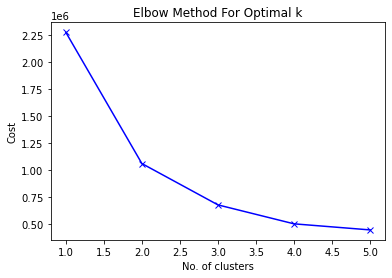

In [8]:
# Elbow curve to find optimal K
cost = []
K = range(1, 6)
for num_clusters in list(K):
    kproto = KPrototypes(n_clusters=num_clusters, init="Cao", n_init=10, n_jobs=-1)
    kproto.fit_predict(train_df, categorical=categorical_idx)
    cost.append(kproto.cost_)

plt.plot(K, cost, "bx-")
plt.xlabel("No. of clusters")
plt.ylabel("Cost")
plt.title("Elbow Method For Optimal k")
plt.show()

> We can see a bend at K=2 in the above graph indicating 2 is the optimal number of clusters.

In [9]:
kproto = KPrototypes(n_clusters=2, init="Cao", n_init=10, n_jobs=-1, verbose=1)
kproto.fit_predict(train_df, categorical=categorical_idx)
# Print the cluster centroids
pd.DataFrame(
    kproto.cluster_centroids_, columns=numerical_features + categorical_features
)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing centroids
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Init: initializing clusters
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Starting iterations...
Run: 2, iteration: 1/100, moves: 22, ncost: 1062513.028029839
Run: 4, iteration: 1/100, moves: 24, ncost: 1062513.0280298393
Run: 3, iteration: 1/100, moves: 34, ncost: 1116462.448691403
Run: 7, iteration: 1/100, moves: 26, ncost: 1116462.448691403
Run: 8, iteration: 1/100, moves: 7,

NRI score metadata_fields_count    parameters_count method  \
0  79.27140493454837     60.99173553719008  1.6234504132231404    get   
1  79.19280235693363     26.54986020503262  1.2511649580615098    get   

  usage_base authentication server_name is_pii is_fii        Country  \
0          2              1           1      1      0  United States   
1          2              1           1      1      0              0   

  security_test_result x0_Broken Authentication x0_Cross-Site Scripting  \
0                    1                        0                       0   
1                    1                        0                       0   

  x0_Insecure Deserialization x0_Missing x0_SQL Injection  \
0                           0          1                0   
1                           0          1                0   

  x0_XML External Entities x-frame-options server content-type  \
0                        0               1      1            0   
1                        0               0      1            0   

  access-control-allow-origin x-xss-protection strict-transport-security  \
0                           0                0                         0   
1                           0                0                         0   

  expect-ct referrer-policy set-cookie x-powered-by x-aspnet-version  \
0         0               0          0            0                0   
1         0               0          0            0                0   

  x-ratelimit-limit security_test_category  
0                 0                Missing  
1                 0                Missing

In [10]:
kproto = KPrototypes(n_clusters=4, init="Cao", n_init=10, n_jobs=-1)
kproto.fit_predict(train_df, categorical=categorical_idx)
# Print the cluster centroids
pd.DataFrame(
    kproto.cluster_centroids_, columns=numerical_features + categorical_features
)

NRI score metadata_fields_count     parameters_count method  \
0  79.63508779948633     32.31350114416476   1.4628146453089246    get   
1   79.3015259253565                  48.0   1.8256624825662482    get   
2  79.25368815816121     68.63330598851518   1.5045118949958982    get   
3  77.25030247358218     1.236180904522613  0.32160804020100503    get   

  usage_base authentication server_name is_pii is_fii        Country  \
0          2              1           1      1      0              0   
1          2              1           1      1      0              0   
2          2              1           1      1      0  United States   
3          2              1           0      0      0         Canada   

  security_test_result x0_Broken Authentication x0_Cross-Site Scripting  \
0                    1                        0                       0   
1                    1                        0                       0   
2                    1                        0                       0   
3                    1                        0                       0   

  x0_Insecure Deserialization x0_Missing x0_SQL Injection  \
0                           0          1                0   
1                           0          1                0   
2                           0          1                0   
3                           0          1                0   

  x0_XML External Entities x-frame-options server content-type  \
0                        0               0      1            0   
1                        0               1      1            0   
2                        0               1      1            0   
3                        0               0      0            0   

  access-control-allow-origin x-xss-protection strict-transport-security  \
0                           0                0                         0   
1                           0                0                         0   
2                           0                1                         0   
3                           0                0                         0   

  expect-ct referrer-policy set-cookie x-powered-by x-aspnet-version  \
0         0               0          0            0                0   
1         0               0          0            0                0   
2         0               0          0            0                0   
3         0               0          0            0                0   

  x-ratelimit-limit security_test_category  
0                 0                Missing  
1                 0                Missing  
2                 0                Missing  
3                 0                Missing

In [11]:
train_df['cluster'] = kproto.labels_
train_df['Risk_Label'] = y_train
train_df.to_csv('cluster.csv')

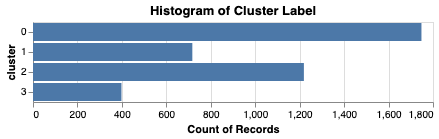

In [20]:
alt.Chart(train_df, title="Histogram of Cluster Label").mark_bar().encode(
     y=alt.Y('cluster', type="nominal"),
     x='count()',
)

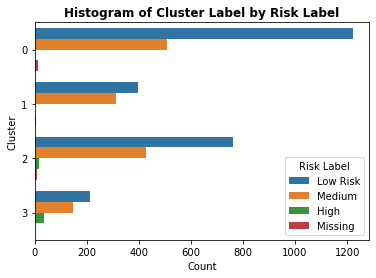

In [30]:
sns.countplot(y="cluster", data=train_df, hue="Risk_Label").set(
    xlabel="Count", ylabel="Cluster"
)
plt.title(
    "Histogram of Cluster Label by Risk Label",
    weight="bold",
)
plt.legend(title="Risk Label")

In [33]:
train_df.groupby(['Risk_Label']).size()

Risk_Label
High          54
Low Risk    2595
Medium      1398
dtype: int64

<hr />

## MCA

In [13]:
import prince